$\textbf{Lecture 4 Assignment}$
-

### **1. Kruskal's Algorithm**

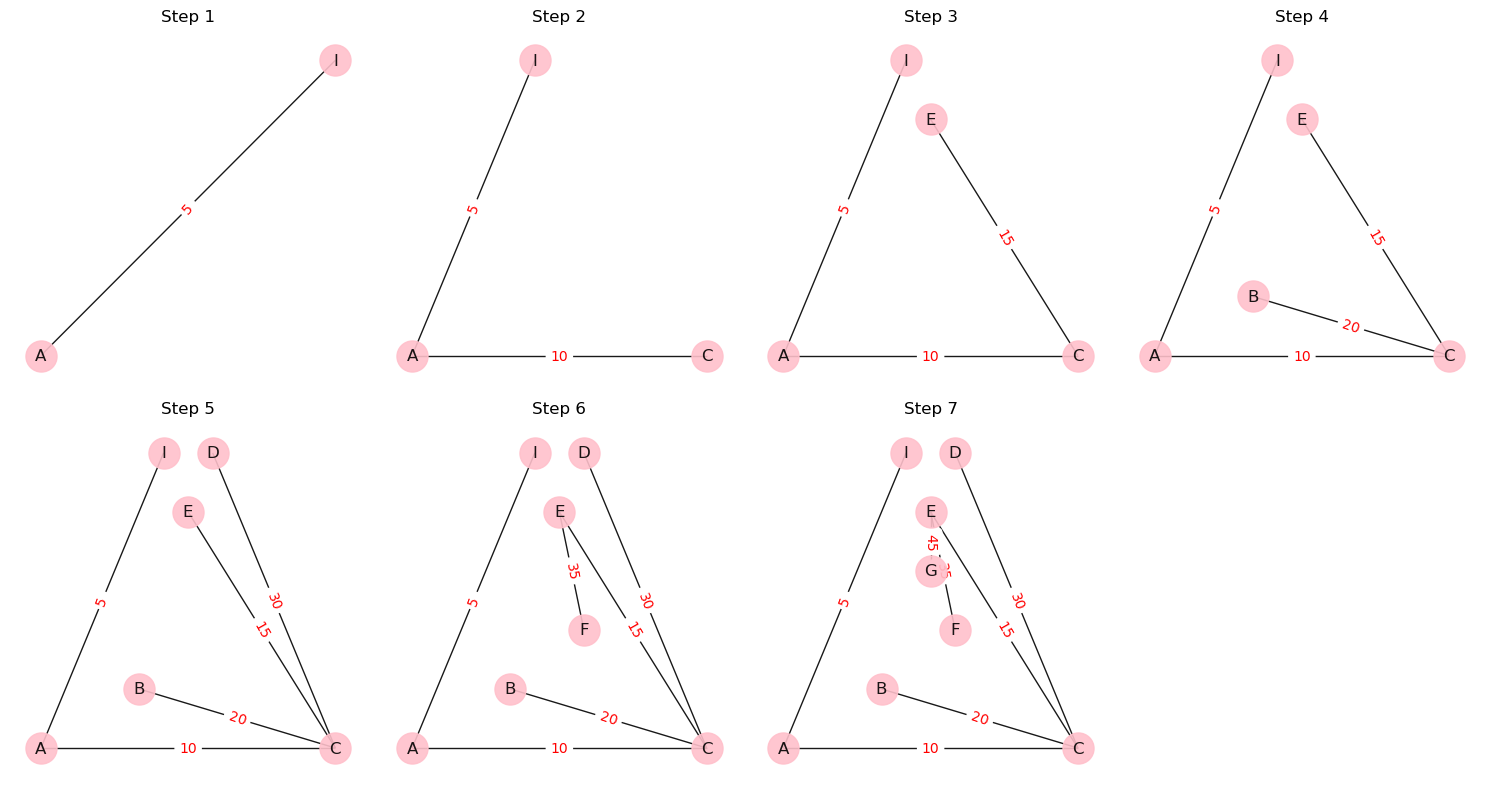

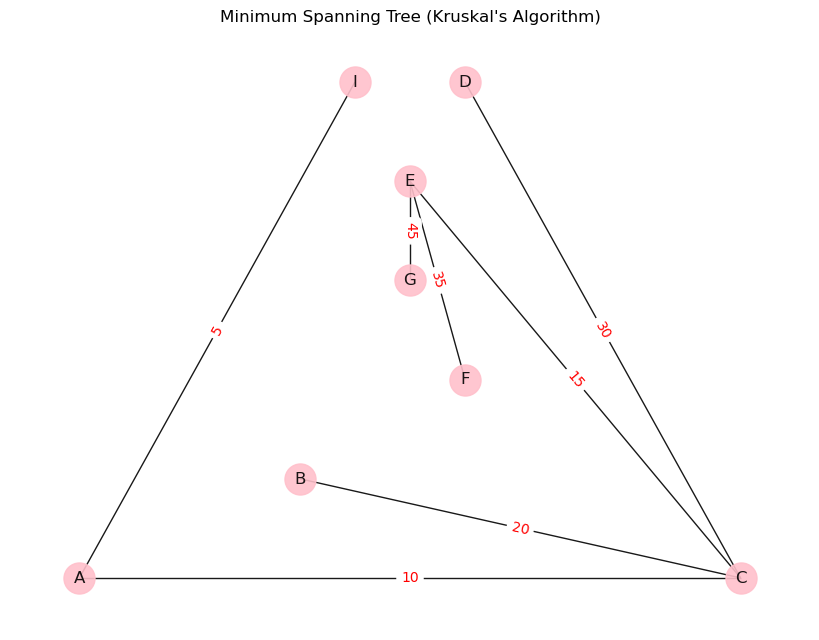

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

def kruskal_algorithm(G):
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    # Sort edges by weight
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    # Create a disjoint set data structure
    disjoint_set = {node: {node} for node in G.nodes()}
    # Store intermediate steps
    steps = []
    for edge in sorted_edges:
        u, v, weight = edge
        # Check if adding the edge creates a cycle
        if disjoint_set[u] != disjoint_set[v]:
            MST.add_edge(u, v, weight=weight['weight'])
            # Merge the sets
            disjoint_set[u].update(disjoint_set[v])
            for node in disjoint_set[v]:
                disjoint_set[node] = disjoint_set[u]
            # Add the current MST to steps
            steps.append(MST.copy())
    return MST, steps

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A","C",10), ("A","I",5), ("C","B",20), ("C","E",15), ("C","D",30), ("B","E",25), ("I","E",40), ("E","F",35), ("F","G",50), ("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Compute the minimum spanning tree using Kruskal's Algorithm
MST, steps = kruskal_algorithm(G)

# Draw each step of the algorithm
plt.figure(figsize=(15, 8))
for i, step in enumerate(steps):
    plt.subplot(2, 4, i + 1)
    pos = nx.planar_layout(G)
    nx.draw(step, pos=pos, with_labels=True, node_size=500, node_color='pink', edge_color='black', width=1, alpha=0.9)
    nx.draw_networkx_edge_labels(step, pos, edge_labels={(u, v): d['weight'] for u, v, d in step.edges(data=True)}, font_color='red')
    plt.title(f"Step {i+1}")
plt.tight_layout()
plt.show()

# Draw the final minimum spanning tree obtained using Kruskal's Algorithm
plt.figure(figsize=(8, 6))
pos = nx.planar_layout(G)
nx.draw(MST, pos=pos, with_labels=True, node_size=500, node_color='pink', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edge_labels(MST, pos, edge_labels={(u, v): d['weight'] for u, v, d in MST.edges(data=True)}, font_color='red')
plt.title("Minimum Spanning Tree (Kruskal's Algorithm)")
plt.show()

### **2. Prim's Algorithm**

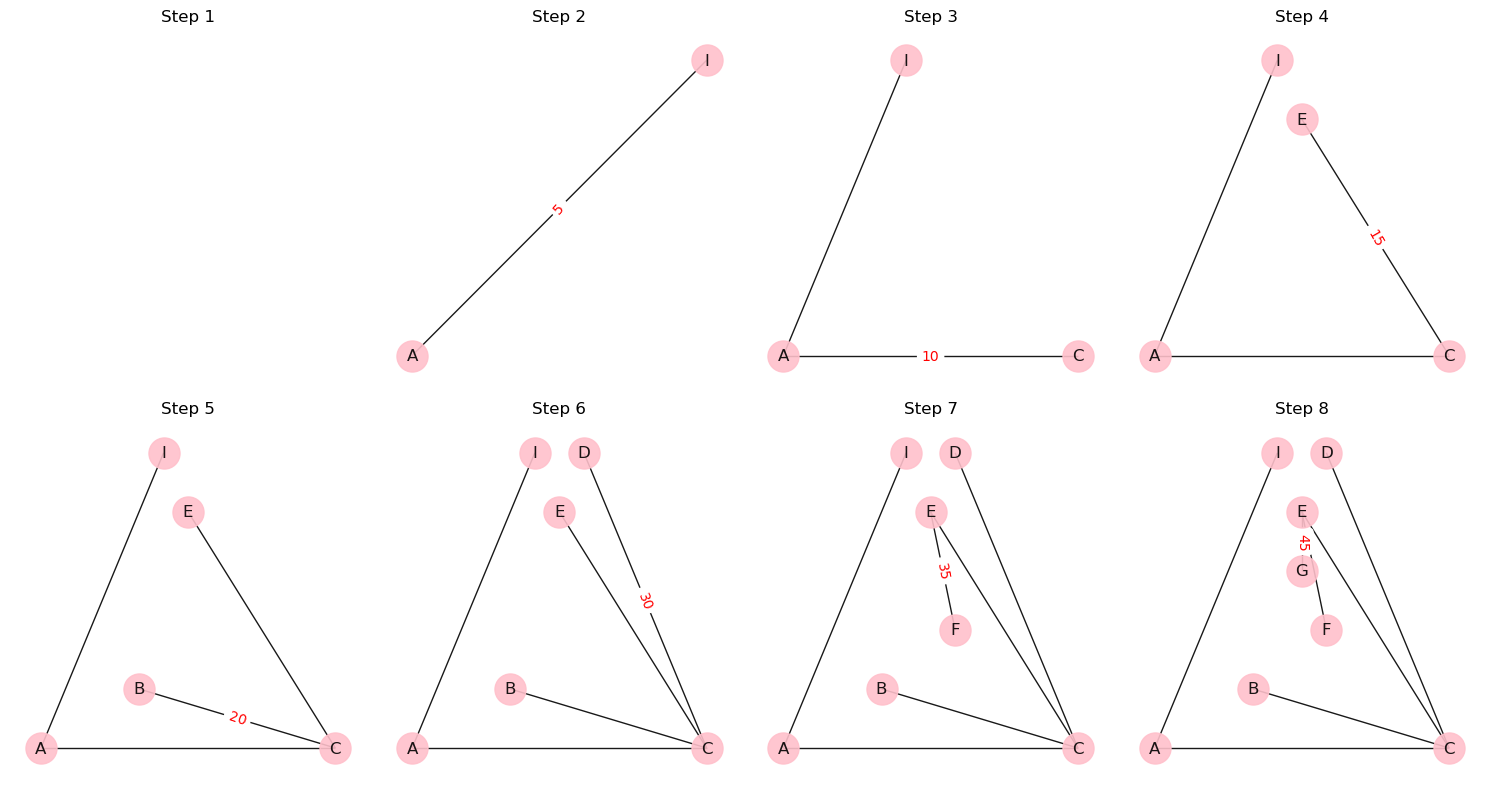

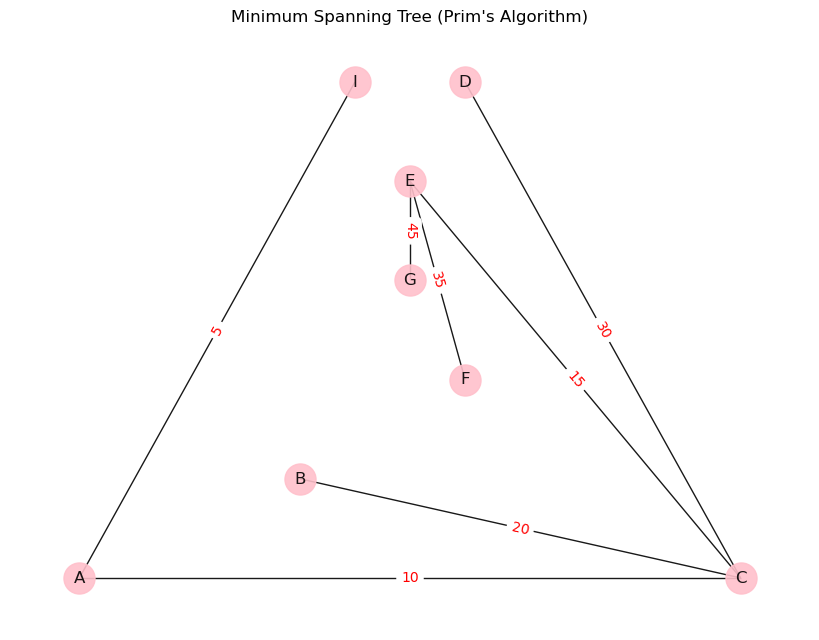

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def prim_algorithm(G, start_node):
    # Initialize the minimum spanning tree
    MST = nx.Graph()
    # Set of vertices included in the MST
    included_vertices = set()
    # Priority queue to store edges with their weights
    priority_queue = []
    # Start from the specified node
    current_node = start_node
    included_vertices.add(current_node)
    # Visualization data
    steps = [(MST.copy(), {})]
    while len(included_vertices) < len(G.nodes()):
        # Add edges connected to the current node to the priority queue
        for neighbor in G.neighbors(current_node):
            if neighbor not in included_vertices:
                priority_queue.append((current_node, neighbor, G[current_node][neighbor]['weight']))
        # Choose the edge with the smallest weight
        priority_queue.sort(key=lambda x: x[2])
        u, v, weight = priority_queue.pop(0)
        # Ensure that adding the edge does not form a cycle
        while v in included_vertices:
            u, v, weight = priority_queue.pop(0)
        # Add the edge to the MST
        MST.add_edge(u, v, weight=weight)
        included_vertices.add(v)
        current_node = v
        # Visualization data
        steps.append((MST.copy(), {(u, v): weight}))
    return MST, steps

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A","C",10), ("A","I",5), ("C","B",20), ("C","E",15), ("C","D",30), ("B","E",25), ("I","E",40), ("E","F",35), ("F","G",50), ("G","E",45)]
G.add_weighted_edges_from(edgelist)

# Compute the minimum spanning tree using Prim's Algorithm
start_node = 'A'  # Choose the starting node
MST_prim, steps = prim_algorithm(G, start_node)

# Draw each step of the algorithm
plt.figure(figsize=(15, 8))
for i, (step, edge_labels) in enumerate(steps):
    plt.subplot(2, 4, i + 1)
    pos = nx.planar_layout(G)
    nx.draw(step, pos=pos, with_labels=True, node_size=500, node_color='pink', edge_color='black', width=1, alpha=0.9)
    nx.draw_networkx_edge_labels(step, pos, edge_labels=edge_labels, font_color='red')
    plt.title(f"Step {i+1}")
plt.tight_layout()
plt.show()

# Draw the final minimum spanning tree obtained using Prim's Algorithm
plt.figure(figsize=(8, 6))
pos = nx.planar_layout(G)
nx.draw(MST_prim, pos=pos, with_labels=True, node_size=500, node_color='pink', edge_color='black', width=1, alpha=0.9)
nx.draw_networkx_edge_labels(MST_prim, pos, edge_labels={(u, v): d['weight'] for u, v, d in MST_prim.edges(data=True)}, font_color='red')
plt.title("Minimum Spanning Tree (Prim's Algorithm)")
plt.show()

### **3. Djitraka's Shortest Path Algorithm**

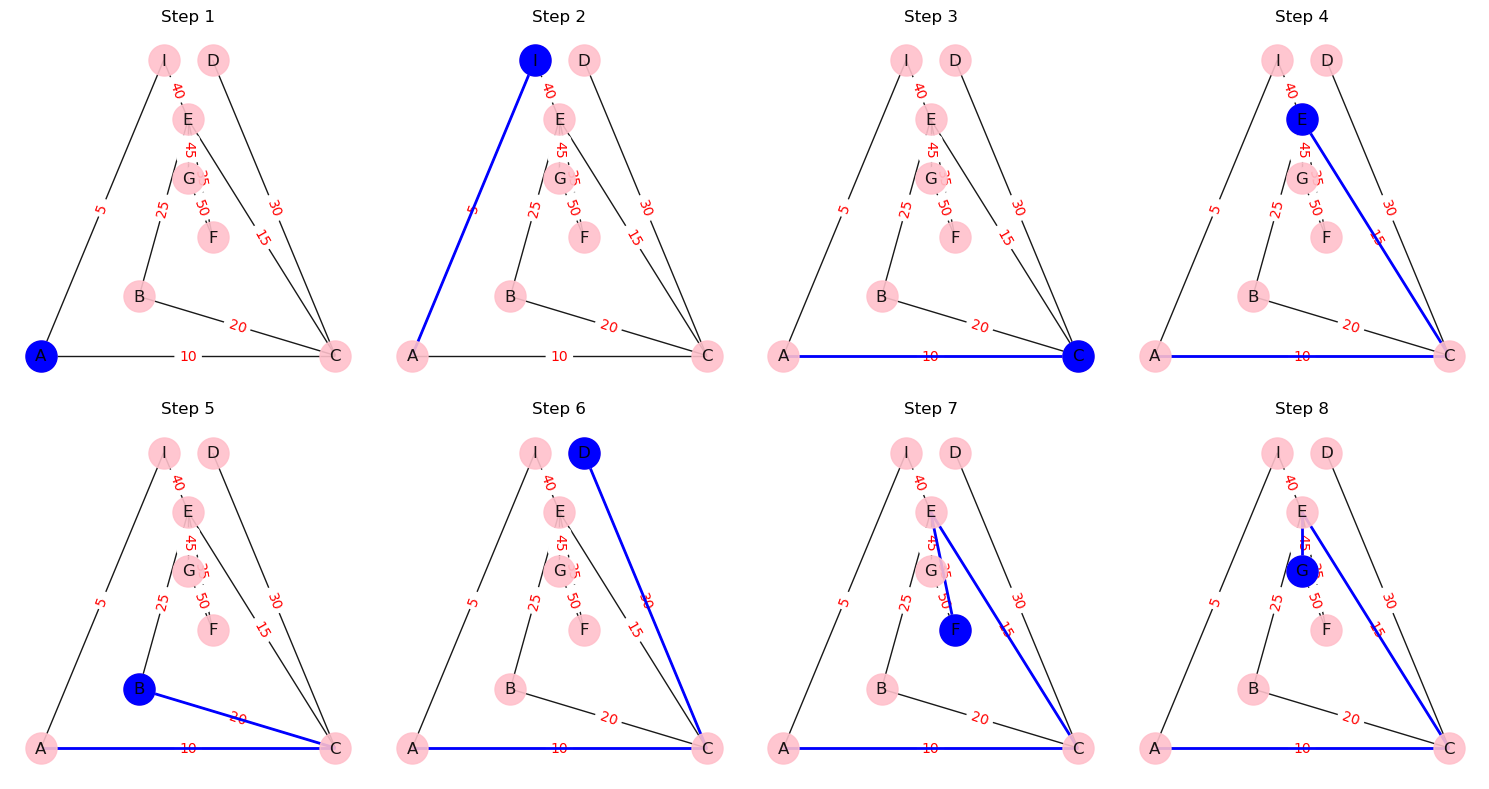

Shortest distances from node A
Node: A - Distance: 0
Node: B - Distance: 30
Node: C - Distance: 10
Node: D - Distance: 40
Node: E - Distance: 25
Node: F - Distance: 60
Node: G - Distance: 70
Node: I - Distance: 5

Predecessors:
Node: A - Predecessor: None
Node: C - Predecessor: A
Node: I - Predecessor: A
Node: E - Predecessor: C
Node: B - Predecessor: C
Node: D - Predecessor: C
Node: F - Predecessor: E
Node: G - Predecessor: E


In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra_algorithm(G, start):
    # Initialize distances to all nodes as infinity
    distances = {node: float('inf') for node in G.nodes()}
    # Distance from start to start is 0
    distances[start] = 0
    # Initialize priority queue with start node and distance 0
    pq = [(0, start)]
    # Initialize dictionary to store predecessors
    predecessors = {start: None}
    # Store intermediate steps
    steps = []

    while pq:
        # Pop the node with the smallest distance from the priority queue
        dist, current_node = heapq.heappop(pq)
        # Check if the popped node is already visited
        if dist > distances[current_node]:
            continue
        # Store the current state
        steps.append((current_node, predecessors.copy(), distances.copy()))

        # Visit neighbors of the current node
        for neighbor in G.neighbors(current_node):
            # Calculate new distance to neighbor
            new_distance = distances[current_node] + G[current_node][neighbor]['weight']
            # Update distance and predecessor if new distance is shorter
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                predecessors[neighbor] = current_node
                # Add neighbor to priority queue with updated distance
                heapq.heappush(pq, (new_distance, neighbor))

    return distances, predecessors, steps

# Define the graph
G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

# Compute shortest paths using Dijkstra's Algorithm
start_node = "A"
shortest_distances, predecessors, steps = dijkstra_algorithm(G, start_node)

# Draw each step of the algorithm
plt.figure(figsize=(15, 8))
for i, (current_node, predecessors_dict, distances_dict) in enumerate(steps):
    plt.subplot(2, 4, i + 1)
    pos = nx.planar_layout(G)
    nx.draw(G, pos=pos, with_labels=True, node_size=500, node_color='pink', edge_color='black', width=1, alpha=0.9)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')
    nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='blue', node_size=500)
    if predecessors_dict[current_node] is not None:
        path = [current_node]
        while path[-1] != start_node:
            path.append(predecessors_dict[path[-1]])
        path.reverse()
        edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='blue', width=2)
    plt.title(f"Step {i + 1}")
plt.tight_layout()
plt.show()

# Print the shortest distances from the start node
print("Shortest distances from node", start_node)
for node, distance in shortest_distances.items():
    print("Node:", node, "- Distance:", distance)

# Print the predecessors for each node
print("\nPredecessors:")
for node, predecessor in predecessors.items():
    print("Node:", node, "- Predecessor:", predecessor)